Data Collection

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Load the Data
file_path = 'Lab_7.csv'  # Updated file path
data = pd.read_csv(file_path)

# Step 2: Display the first few rows and the columns to identify the closing price column
print("First few rows of the dataset:")
print(data.head())
print("\nColumns in the dataset:", data.columns)

# Step 3: Keep only 'Date' and the 'Price' column
data = data[['Date', 'Price']]  # Keep 'Date' and 'Price' columns

# Step 4: Rename the 'Price' column for consistency
data.rename(columns={'Price': 'Close'}, inplace=True)

# Step 5: Convert 'Date' to datetime format
data['Date'] = pd.to_datetime(data['Date'], format='%d-%m-%Y')

# Step 6: Convert the 'Close' column to float after removing commas
data['Close'] = data['Close'].str.replace(',', '').astype(float)

# Step 7: Sort the data by date
data = data.sort_values('Date')

# Display the cleaned data
print("Cleaned data:")
print(data.head())




First few rows of the dataset:
         Date     Price      Open      High       Low    Vol. Change %
0  16-10-2024  2,708.15  2,680.00  2,728.00  2,675.25  10.02M    0.75%
1  15-10-2024  2,688.05  2,717.05  2,743.40  2,681.40  16.88M   -2.08%
2  14-10-2024  2,745.05  2,758.90  2,760.15  2,736.50   6.11M    0.03%
3  11-10-2024  2,744.20  2,740.00  2,766.55  2,737.65   3.99M    0.08%
4  10-10-2024  2,742.10  2,760.05  2,772.00  2,738.85  11.18M   -0.26%

Columns in the dataset: Index(['Date', 'Price', 'Open', 'High', 'Low', 'Vol.', 'Change %'], dtype='object')
Cleaned data:
          Date    Close
249 2023-10-16  2344.05
248 2023-10-17  2355.25
247 2023-10-18  2324.00
246 2023-10-19  2306.15
245 2023-10-20  2299.10


Plot the raw data

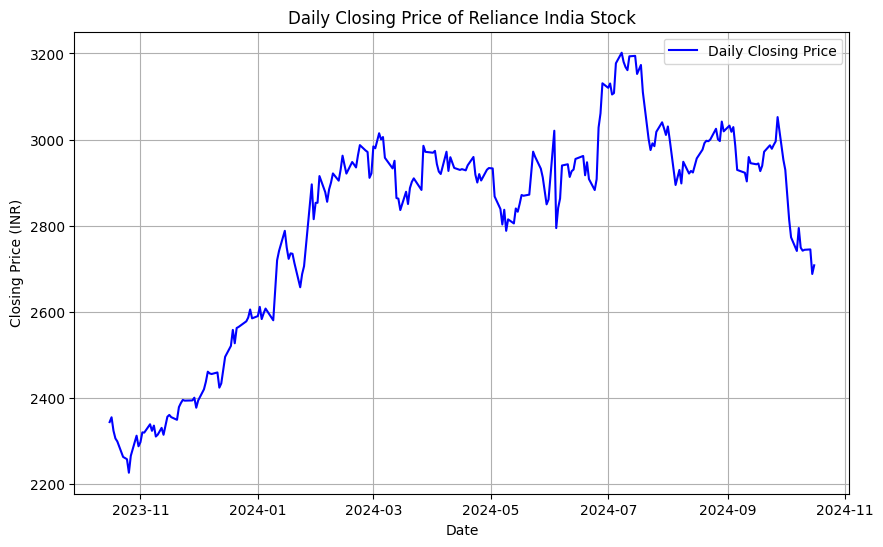

In [20]:

plt.figure(figsize=(10, 6))
plt.plot(data['Date'], data['Close'], label='Daily Closing Price', color='blue')
plt.xlabel('Date')
plt.ylabel('Closing Price (INR)')
plt.title('Daily Closing Price of Reliance India Stock')
plt.legend()
plt.grid(True)
plt.show()

Apply smoothing techniques and Visualize

Simple Moving Average (SMA) - One-sided

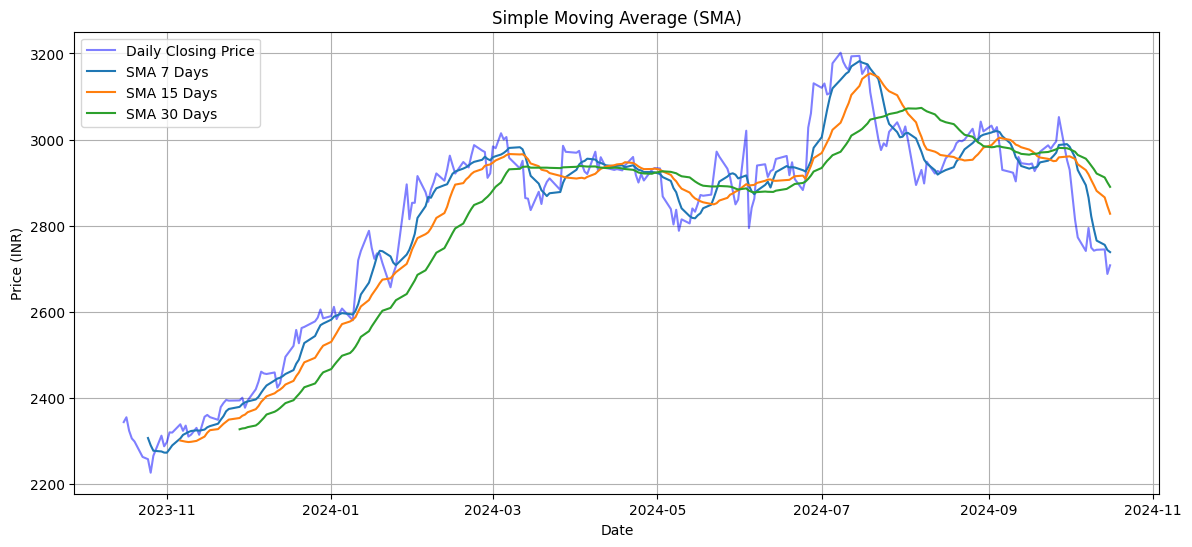

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
file_path = 'Lab_7.csv'
data = pd.read_csv(file_path)

# Clean the data
data = data[['Date', 'Price']]
data.rename(columns={'Price': 'Close'}, inplace=True)
data['Date'] = pd.to_datetime(data['Date'], format='%d-%m-%Y')
data['Close'] = data['Close'].str.replace(',', '').astype(float)
data = data.sort_values('Date')

# Compute and plot the Simple Moving Average (SMA)
window_sizes_sma = [7, 15, 30]

plt.figure(figsize=(14, 6))
plt.plot(data['Date'], data['Close'], label='Daily Closing Price', color='blue', alpha=0.5)

for window in window_sizes_sma:
    data[f'SMA_{window}'] = data['Close'].rolling(window=window).mean()
    plt.plot(data['Date'], data[f'SMA_{window}'], label=f'SMA {window} Days')

plt.title('Simple Moving Average (SMA)')
plt.xlabel('Date')
plt.ylabel('Price (INR)')
plt.legend()
plt.grid()
plt.show()


Centered Moving Average (CMA)

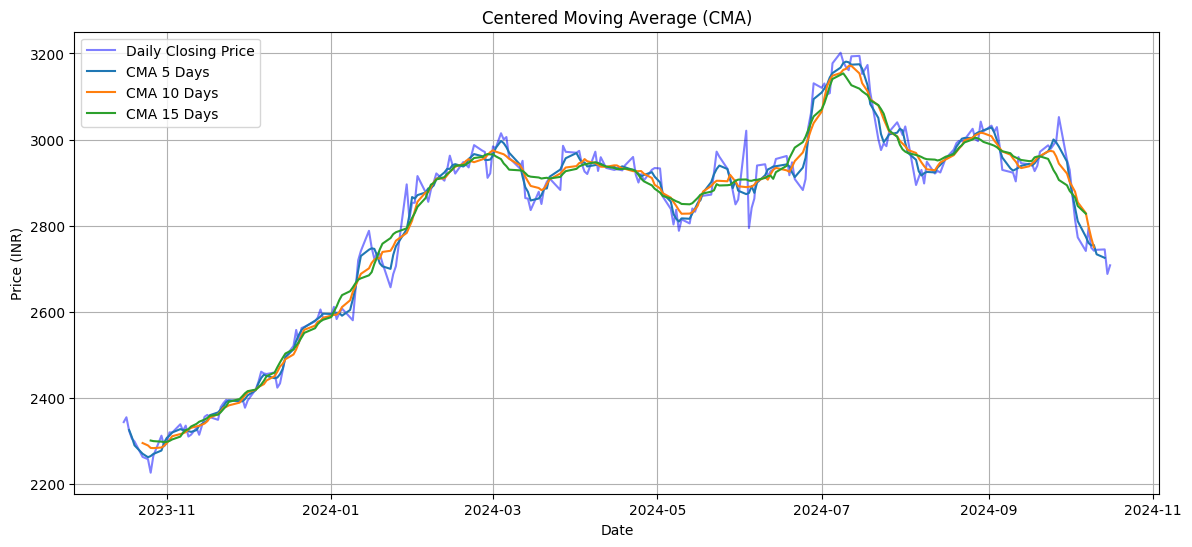

In [23]:
# Compute and plot the Centered Moving Average (CMA)
window_sizes_cma = [5, 10, 15]

plt.figure(figsize=(14, 6))
plt.plot(data['Date'], data['Close'], label='Daily Closing Price', color='blue', alpha=0.5)

for window in window_sizes_cma:
    data[f'CMA_{window}'] = data['Close'].rolling(window=window, center=True).mean()
    plt.plot(data['Date'], data[f'CMA_{window}'], label=f'CMA {window} Days')

plt.title('Centered Moving Average (CMA)')
plt.xlabel('Date')
plt.ylabel('Price (INR)')
plt.legend()
plt.grid()
plt.show()


Weighted Moving Average (WMA)

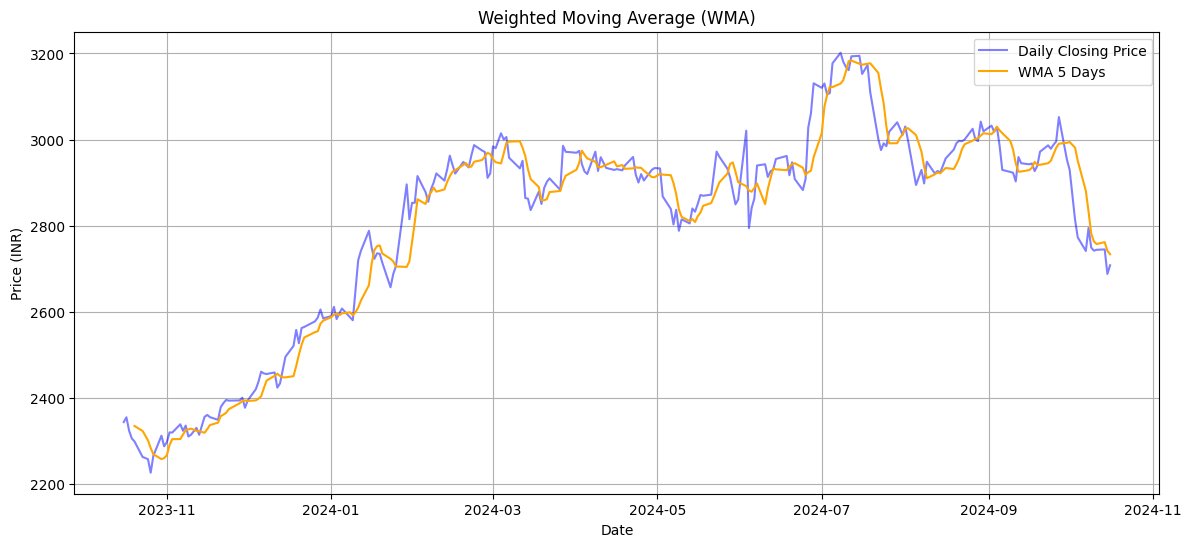

In [26]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
file_path = 'Lab_7.csv'
data = pd.read_csv(file_path)

# Clean the data
data = data[['Date', 'Price']]
data.rename(columns={'Price': 'Close'}, inplace=True)
data['Date'] = pd.to_datetime(data['Date'], format='%d-%m-%Y')
data['Close'] = data['Close'].str.replace(',', '').astype(float)
data = data.sort_values('Date')

# Compute and plot the Weighted Moving Average (WMA)
def weighted_moving_average(x):
    weights = [5, 4, 3, 2, 1]  # Define weights
    return sum(weights[i] * x.iloc[i] for i in range(len(weights))) / sum(weights)

# Calculate WMA with a rolling window of 5 days
data['WMA_5'] = data['Close'].rolling(window=5).apply(weighted_moving_average, raw=False)

# Plotting
plt.figure(figsize=(14, 6))
plt.plot(data['Date'], data['Close'], label='Daily Closing Price', color='blue', alpha=0.5)
plt.plot(data['Date'], data['WMA_5'], label='WMA 5 Days', color='orange')

plt.title('Weighted Moving Average (WMA)')
plt.xlabel('Date')
plt.ylabel('Price (INR)')
plt.legend()
plt.grid()
plt.show()
